Import Required Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

Import the data

In [3]:
data = '/content/drive/MyDrive/cars/Car-Bike-Dataset'

In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [5]:
for image_class in os.listdir(data): 
    for image in os.listdir(os.path.join(data, image_class)):
        image_path = os.path.join(data, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [6]:
df = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/cars/Car-Bike-Dataset')

Found 3969 files belonging to 2 classes.


In [7]:
df_iterator = df.as_numpy_iterator()


In [8]:
batch = df_iterator.next()

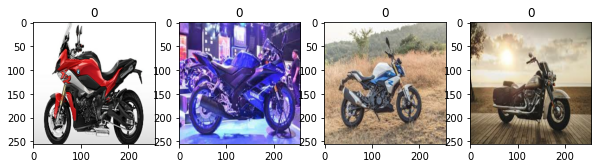

In [9]:
fig, ax = plt.subplots(ncols=4, figsize=(10,10))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [10]:
df = df.map(lambda x,y: (x/255, y))
df.as_numpy_iterator().next()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


(array([[[[0.9869179 , 1.        , 0.93201596],
          [0.9863281 , 0.9589844 , 0.9255668 ],
          [0.96929383, 0.8753294 , 0.8765855 ],
          ...,
          [0.13725491, 0.11631434, 0.09278493],
          [0.17071845, 0.14326747, 0.11973805],
          [0.16140471, 0.12741268, 0.1071538 ]],
 
         [[0.97683823, 0.996642  , 0.93057597],
          [0.97624844, 0.95394176, 0.9255612 ],
          [0.94965196, 0.8626426 , 0.8720491 ],
          ...,
          [0.15453431, 0.13359375, 0.11006434],
          [0.17787883, 0.15042785, 0.12689844],
          [0.15492213, 0.12093009, 0.10067121]],
 
         [[0.96096814, 0.9913549 , 0.92830884],
          [0.96037835, 0.94600224, 0.9255523 ],
          [0.91872656, 0.8426677 , 0.86490667],
          ...,
          [0.1817402 , 0.16079964, 0.13727023],
          [0.18915261, 0.16170163, 0.13817222],
          [0.14471549, 0.11072346, 0.09046457]],
 
         ...,
 
         [[0.2691718 , 0.28485808, 0.3319169 ],
          [0.32793

In [11]:
train_size = int(len(df)*.6)
val_size = int(len(df)*.2)
test_size = int(len(df)*.2)

In [12]:
train = df.take(train_size)
val = df.skip(train_size).take(val_size)
test = df.skip(train_size+val_size).take(test_size)

Train the Model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [14]:
model = Sequential()


In [15]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [18]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
75/75 [==============================] - 218s 3s/step - loss: 0.0177 - accuracy: 0.9950 - val_loss: 0.4131 - val_accuracy: 0.9175
Epoch 2/10
75/75 [==============================] - 210s 3s/step - loss: 0.0057 - accuracy: 0.9987 - val_loss: 0.3345 - val_accuracy: 0.9350
Epoch 3/10
75/75 [==============================] - 194s 3s/step - loss: 8.4017e-04 - accuracy: 1.0000 - val_loss: 0.4713 - val_accuracy: 0.9175
Epoch 4/10
75/75 [==============================] - 205s 3s/step - loss: 6.6652e-04 - accuracy: 1.0000 - val_loss: 0.3860 - val_accuracy: 0.9438
Epoch 5/10
75/75 [==============================] - 205s 3s/step - loss: 0.0035 - accuracy: 0.9996 - val_loss: 0.3976 - val_accuracy: 0.9362
Epoch 6/10
75/75 [==============================] - 191s 3s/step - loss: 0.0034 - accuracy: 0.9983 - val_loss: 0.4060 - val_accuracy: 0.9287
Epoch 7/10
75/75 [==============================] - 204s 3s/step - loss: 6.2938e-04 - accuracy: 1.0000 - val_loss: 0.3649 - val_accuracy: 0.9300
E

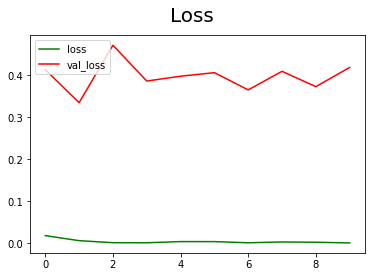

In [20]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='green', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

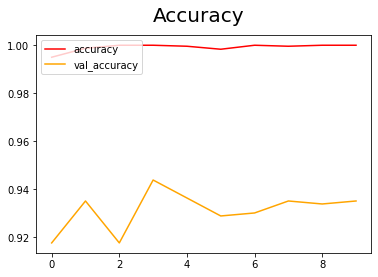

In [22]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='red', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [24]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [25]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)  

1/1 [==============================] - 0s 111ms/step


In [26]:
print(precision.result(), recall.result(), accuracy.result())

tf.Tensor(0.8948655, shape=(), dtype=float32) tf.Tensor(0.9312977, shape=(), dtype=float32) tf.Tensor(0.9089727, shape=(), dtype=float32)


Testing the model

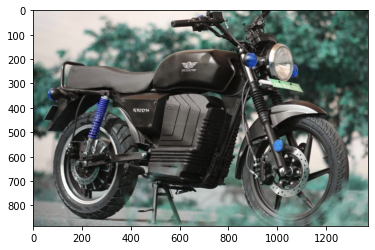

In [34]:
img = cv2.imread('/content/drive/MyDrive/kridn-electric-motorcycle.jpg')
plt.imshow(img)
plt.show()

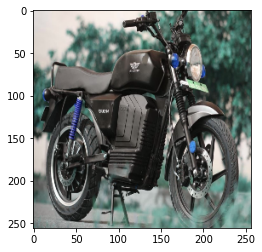

In [35]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [36]:
classify = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 69ms/step


In [37]:
classify

array([[1.20284165e-11]], dtype=float32)

In [38]:
if classify > 0.5: 
    print(f'Car')
else:
    print(f'Bike')

Bike


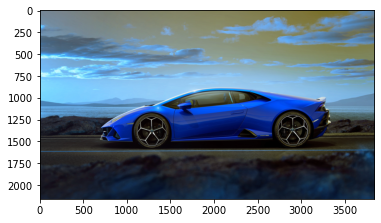

In [42]:
img2 = cv2.imread('/content/drive/MyDrive/4K_Photo_of_2019_Lamborghini_Huracan_EVO_Car.jpg')
plt.imshow(img2)
plt.show()

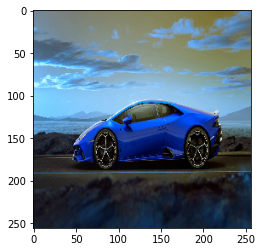

In [44]:
resize = tf.image.resize(img2, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [45]:
classify2 = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 141ms/step


In [47]:
if classify2 > 0.5: 
    print(f'Car')
else:
    print(f'Bike')

Car


In [50]:
 print(accuracy.result())

tf.Tensor(0.9089727, shape=(), dtype=float32)


accuracy is 0.9